In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import scipy.stats
import scipy.stats
import scipy.special

In [8]:
simulation_subfolder1 = "single_population"
simulation_subfolder2 = "tracy_widom"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder1,simulation_subfolder2)
print(simulation_subfolder)

/Users/fmichaud/PycharmProjects/medeas_simulations/single_population/tracy_widom


/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


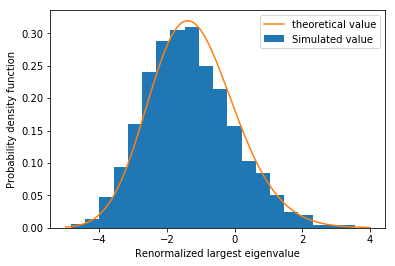

In [9]:
L = 5000
n = 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Renormalized largest eigenvalue")
ax.set_ylabel(r"Probability density function")

ax = fig.add_subplot(111)

input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
tws = []
for line in input_files:
    tw = line.split(" ")[4]
    tws.append(float(tw))
tws = np.array(tws)
ax.hist(tws,20,normed=1,label = "Simulated value")
tw_distrib = np.loadtxt(os.path.join(home_folder,simulation_subfolder1,"tracy_widom_pdf.dat"))
ax.plot(tw_distrib[:,0],tw_distrib[:,1],label = "theoretical value")
plt.legend()
plt.savefig(os.path.join(simulation_subfolder,"tracy_widom_example_cumulative.pdf"))


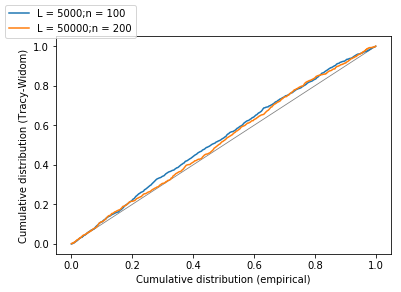

In [341]:
plt.plot([0,1],[0,1],c = "grey",lw = 0.8)
tw_distrib = np.loadtxt(os.path.join(home_folder,simulation_subfolder1,"tracy_widom_pdf.dat"))

n = 100
L=5000
input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
tws = []
for line in input_files:
    tw = line.split(" ")[4]
    tws.append(float(tw))
tws = np.array(tws)
cumulative = [sum(tws<x)/len(tws) for x in tw_distrib[:,0]]
plt.plot(np.cumsum(tw_distrib[:,1])/100,cumulative,label = f'L = {L};n = {n}')


n = 200
L=50000
input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
tws = []
for line in input_files:
    tw = line.split(" ")[4]
    tws.append(float(tw))
tws = np.array(tws)
cumulative = [sum(tws<x)/len(tws) for x in tw_distrib[:,0]]
plt.plot(np.cumsum(tw_distrib[:,1])/100,cumulative,label = f'L = {L};n = {n}')

plt.figlegend(loc = "upper left")
plt.xlabel("Cumulative distribution (empirical)")
plt.ylabel("Cumulative distribution (Tracy-Widom)")
plt.savefig(os.path.join(simulation_subfolder,"Tracy-Widom_patterson.pdf"))

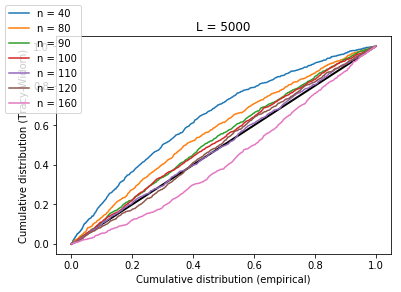

In [342]:
ns = [40,80,90,100,110,120,160]
L=5000
plt.plot([0,1],[0,1],c = "black",lw = 2)
for n in ns:    
    input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
    tws = []
    for line in input_files:
        tw = line.split(" ")[4]
        tws.append(float(tw))
    tws = np.array(tws)
    tw_distrib = np.loadtxt(os.path.join(home_folder,simulation_subfolder1,"tracy_widom_pdf.dat"))
    tws = np.array(tws)
    cumulative = [sum(tws<x)/len(tws) for x in tw_distrib[:,0]]
    plt.plot(np.cumsum(tw_distrib[:,1])/100,cumulative,label = f'n = {n}')
plt.figlegend(loc = "upper left")
plt.title(f'L = {L}')
plt.xlabel("Cumulative distribution (empirical)")
plt.ylabel("Cumulative distribution (Tracy-Widom)")
plt.savefig(os.path.join(simulation_subfolder,"Tracy-Widom_various_n.pdf"))

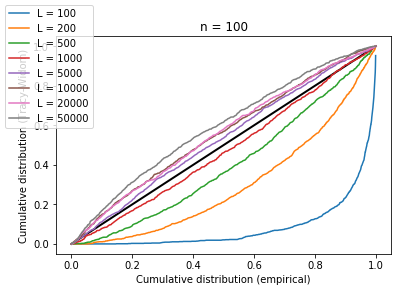

In [344]:
n = 100
Ls=[100,200,500,1000,5000,10000,20000,50000]
plt.plot([0,1],[0,1],c = "black",lw = 2)
for L in Ls:    
    input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
    tws = []
    for line in input_files:
        tw = line.split(" ")[4]
        tws.append(float(tw))
    tws = np.array(tws)
    tw_distrib = np.loadtxt(os.path.join(home_folder,simulation_subfolder1,"tracy_widom_pdf.dat"))
    tws = np.array(tws)
    cumulative = [sum(tws<x)/len(tws) for x in tw_distrib[:,0]]
    plt.plot(np.cumsum(tw_distrib[:,1])/100,cumulative,label = f'L = {L}')
plt.figlegend(loc = "upper left")
plt.title(f'n = {n}')
plt.xlabel("Cumulative distribution (empirical)")
plt.ylabel("Cumulative distribution (Tracy-Widom)")
plt.savefig(os.path.join(simulation_subfolder,"Tracy-Widom_various_L.pdf"))


/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


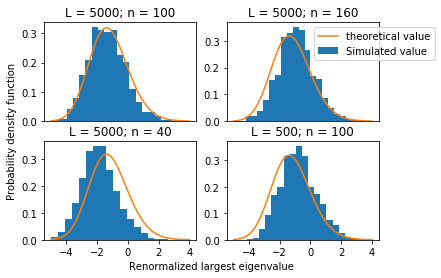

In [346]:
L = 5000
n = 100
all_L_n = [(5000,100),(5000,160),(5000,40),(500,100)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Renormalized largest eigenvalue")
ax.set_ylabel(r"Probability density function")
for (index_plot, (L,n)) in enumerate(all_L_n):
    ax = fig.add_subplot(2,2,index_plot+1)

    input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
    tws = []
    for line in input_files:
        tw = line.split(" ")[4]
        tws.append(float(tw))
    tws = np.array(tws)
    ax.hist(tws,20,normed=1,label = "Simulated value")
    tw_distrib = np.loadtxt(os.path.join(home_folder,simulation_subfolder1,"tracy_widom_pdf.dat"))
    ax.plot(tw_distrib[:,0],tw_distrib[:,1],label = "theoretical value")
    if index_plot == 1:
        ax.legend(loc="upper right",bbox_to_anchor=(1.4, 1))
    ax.set_title(f'L = {L}; n = {n}')
    if index_plot < 2:
        ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        top='off',
        bottom='off',
        labelbottom='off') # labels along the bottom edge are off)
plt.savefig(os.path.join(simulation_subfolder,"tracy_widom_example_cumulative.pdf"))
    

5.5067062021407764e-17   0.9999999999999999


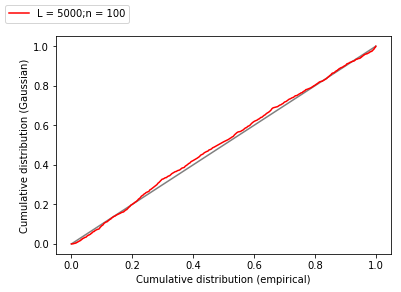

In [347]:
density = 100.
xs = np.arange(-5,5,1/density)

n = 100
L=5000
input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
tws = []
for line in input_files:
    tw = line.split(" ")[4]
    tws.append(float(tw))
tws = np.array(tws)
mean_tws = np.mean(tws)
std_tws = np.std(tws)
tws = (tws -mean_tws)/(std_tws)
cumulative = np.array([sum(tws<x)/len(tws) for x in xs])
print(np.mean(tws)," ",np.std(tws))
normal_distrib = scipy.stats.norm.pdf(xs)
plt.plot([0,1],[0,1],c = "grey")
plt.plot(scipy.stats.norm.cdf(xs),cumulative,label = f'L = {L};n = {n}',c="red")
plt.figlegend(loc = "upper left")
plt.xlabel("Cumulative distribution (empirical)")
plt.ylabel("Cumulative distribution (Gaussian)")

plt.savefig(os.path.join(simulation_subfolder,"Gaussian.pdf"))

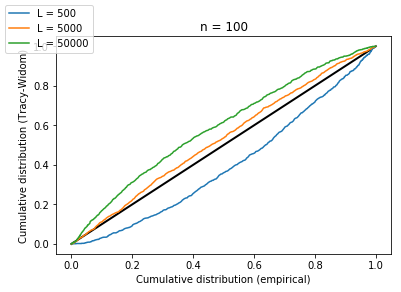

In [335]:
n = 100
Ls=[500,5000,50000]
plt.plot([0,1],[0,1],c = "black",lw = 2)
for L in Ls:    
    input_files = open(os.path.join(simulation_subfolder,f'L_{L}n_{n}/tracy_widom.dat'),"r")
    tws = []
    for line in input_files:
        tw = line.split(" ")[4]
        tws.append(float(tw))
    tws = np.array(tws)
    tw_distrib = np.loadtxt(os.path.join(home_folder,simulation_subfolder1,"tracy_widom_pdf.dat"))
    tws = np.array(tws)
    cumulative = [sum(tws<x)/len(tws) for x in tw_distrib[:,0]]
    plt.plot(np.cumsum(tw_distrib[:,1])/100,cumulative,label = f'L = {L}')
plt.figlegend(loc = "upper left")
plt.title(f'n = {n}')
plt.xlabel("Cumulative distribution (empirical)")
plt.ylabel("Cumulative distribution (Tracy-Widom)")